* To run this notebook first download a grid in the box $[-120,-60]\times[-60,0]$ of the etopo1 DEM:
https://maps.ngdc.noaa.gov/viewers/wcs-client/

* Then download this grid from the geoclaw software http://www.geoclaw.org/topo/etopo/etopo10min120W60W60S0S.asc
* Trim the header, reshape as a matrix of (361,361), flipud, multiply by -1 and save it as "topogeoclaw"
* Put topogeoclaw into this folder.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from netCDF4 import Dataset

Load data

In [2]:
my_example_nc_file = 'etopo1.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [3]:
k = 10
cellsize = 1/60.*k # in minutes
z = fh['Band1'][::k,::k]

south = -60
north = 0
west = -120
east = -60

Get grid properties

In [4]:
ncols = z.shape[1]
nrows = z.shape[0]
xll = west
yll = south
cell = cellsize
xur = xll + (ncols-1)*cell
yur = yll + (nrows-1)*cell
print('ncols,nrows = {},{}'.format(ncols,nrows))
print('lower corner = {}, {}, {}'.format(xll,yll,z.min()))
print('upper corner = {}, {}, {}'.format(xur,yur,z.max()))

ncols,nrows = 361,361
lower corner = -120, -60, -8084
upper corner = -60.0, 0.0, 5717


# grd for easywave
Write .grd file

In [5]:
def writeGRD(z,name):
    f = open(name,'w')
    f.write('DSAA\n')
    f.write('%i %i\n'%(ncols, nrows))
    f.write('%.3f %.3f\n'%(xll,xur))
    f.write('%.3f %.3f\n'%(yll,yur))


    f.write('%.3f %.3f\n'%(z.min(),z.max()))

    s = [' '.join(['%.5f '%num for num in z[-i,:]]) for i in range(z.shape[0])]

    for ss in s:
        f.write('%s\n'%ss)
    f.close()

writeGRD(np.flipud(z),'gebco{}mins.grd'.format(k))

Write the matrix alone

In [6]:
np.savetxt('bathymetry_SA',-z)

(361, 361)


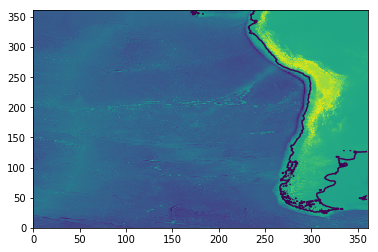

In [7]:
print(z.shape)
plt.pcolormesh(z)
plt.contour(z,[0.0])

In [8]:
from scipy.misc import toimage

In [9]:
toimage?

In [13]:
im = toimage(np.flipud(-z))

im.save('bathymetry_SA.png')

# Geoclaw data

In [14]:
ncols = z.shape[1]
nrows = z.shape[0]
xll = west
yll = south
cell = cellsize
xur = xll + (ncols-1)*cell
yur = yll + (nrows-1)*cell

header = '''{mx} \t mx
{my} \t my
{xllcorner} \t xllcorner
{yllcorner} \t yllcorner
{cellsize} \t cellsize
{nodatavalue} \t nodataval
'''.format(**{
    'mx':ncols,
    'my':nrows,
    'xllcorner':xll,
    'yllcorner':yll,
    'cellsize':cell,
    'nodatavalue':99999
})
print(header)

361 	 mx
361 	 my
-120 	 xllcorner
-60 	 yllcorner
0.16666666666666666 	 cellsize
99999 	 nodataval



In [15]:
outstr = header + ' '.join(map(lambda zi: str(zi)+'\n', np.flipud(z).flatten()))

f = open('bathymetry_SA.tt2','w')
f.write(outstr)
f.close()

In [16]:
!head bathymetry_SA.tt2

361 	 mx
361 	 my
-120 	 xllcorner
-60 	 yllcorner
0.16666666666666666 	 cellsize
99999 	 nodataval
-4140
 -4139
 -4107
 -4042
